# L'Efficacite des Combustible Analyse 

###### Ce analyse a pour objectif de comprendre l'efficacite des combustible automobile. Dans ce projet nous allons travailler sur les donnees sur l'efficacite des combustible. Ces donnes son collecter par Le Departement de l'energie et la l'Agence de protection de l'environnement des USA. il regroupe les marque et modele de vehicule disposnible sur le territoire Americain. ce Data Set contient aussi les donnees sur des attribue tres utile. ce lien suivant vous permettra d'avoir plus de detaille sur la signification des attribut https://www.fueleconomy.gov/feg/ws/index.shtml

### 1. Importation des packages pour le l'analyse

In [3]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

In [4]:
vehicle = pd.read_csv("/Volumes/PERSONNAL/DataScience/Automobile_Analyse/Data/vehicles.csv")

/opt/anaconda3/envs/pythonProject/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3444: DtypeWarning: Columns (70,71,72,73,74,76,79) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [5]:
vehicle.shape

(44889, 83)

###### Le Data Set est compose de 44889 ligne et 83 columns. voyons maintenant le non des columns.

In [6]:
columns_names = vehicle.columns.values
print(columns_names)

['barrels08' 'barrelsA08' 'charge120' 'charge240' 'city08' 'city08U'
 'cityA08' 'cityA08U' 'cityCD' 'cityE' 'cityUF' 'co2' 'co2A'
 'co2TailpipeAGpm' 'co2TailpipeGpm' 'comb08' 'comb08U' 'combA08'
 'combA08U' 'combE' 'combinedCD' 'combinedUF' 'cylinders' 'displ' 'drive'
 'engId' 'eng_dscr' 'feScore' 'fuelCost08' 'fuelCostA08' 'fuelType'
 'fuelType1' 'ghgScore' 'ghgScoreA' 'highway08' 'highway08U' 'highwayA08'
 'highwayA08U' 'highwayCD' 'highwayE' 'highwayUF' 'hlv' 'hpv' 'id' 'lv2'
 'lv4' 'make' 'model' 'mpgData' 'phevBlended' 'pv2' 'pv4' 'range'
 'rangeCity' 'rangeCityA' 'rangeHwy' 'rangeHwyA' 'trany' 'UCity' 'UCityA'
 'UHighway' 'UHighwayA' 'VClass' 'year' 'youSaveSpend' 'guzzler'
 'trans_dscr' 'tCharger' 'sCharger' 'atvType' 'fuelType2' 'rangeA'
 'evMotor' 'mfrCode' 'c240Dscr' 'charge240b' 'c240bDscr' 'createdOn'
 'modifiedOn' 'startStop' 'phevCity' 'phevHwy' 'phevComb']


### 2. Exploration et description du donnees sur l'efficacite des combustible

###### Apres l'importation du donnees, faisont maintenant une analyse description du donnees pour le comprendre, rappelons que ce donnees est collecte pour mesurer l'efficacite de different combustible.

In [7]:
print("le nombre d'annee que ces donnee couvre")
print(len(pd.unique(vehicle.year)))
print("Le maximum et le minimun des annees")
print(max(vehicle.year), min(vehicle.year))
print("Les combustible de type 1 utiliser")
print(pd.value_counts(vehicle.fuelType1))
print("Les combustibles de types 2")
print(pd.value_counts(vehicle.fuelType2))
print("les transmission")
print(pd.value_counts(vehicle.trany))    

le nombre d'annee que ces donnee couvre
40
Le maximum et le minimun des annees
2023 1984
Les combustible de type 1 utiliser
Regular Gasoline     29448
Premium Gasoline     13632
Diesel                1232
Electricity            375
Midgrade Gasoline      142
Natural Gas             60
Name: fuelType1, dtype: int64
Les combustibles de types 2
E85            1498
Electricity     275
Natural Gas      20
Propane           8
Name: fuelType2, dtype: int64
les transmission
Automatic 4-spd                     11048
Manual 5-spd                         8384
Automatic (S6)                       3291
Automatic 3-spd                      3151
Manual 6-spd                         2966
Automatic (S8)                       2578
Automatic 5-spd                      2203
Automatic 6-spd                      1740
Manual 4-spd                         1483
Automatic (variable gear ratios)      988
Automatic (S5)                        842
Automatic 8-spd                       752
Automatic 7-spd          

In [8]:
print(len(pd.unique((vehicle.make))))

141


In [9]:
marque = pd.value_counts(vehicle.make)
print(pd.value_counts(vehicle.make))

Chevrolet           4274
Ford                3643
GMC                 2682
Dodge               2655
Toyota              2260
                    ... 
London Taxi            1
Excalibur Autos        1
ASC Incorporated       1
Mahindra               1
Qvale                  1
Name: make, Length: 141, dtype: int64


In [10]:
print(pd.value_counts(vehicle.phevBlended))

False    44673
True       216
Name: phevBlended, dtype: int64


In [11]:
print(pd.value_counts(vehicle.cylinders))

4.0     17502
6.0     15350
8.0      9556
5.0       776
12.0      693
3.0       367
10.0      187
2.0        63
16.0       17
Name: cylinders, dtype: int64


## Analyse de l'efficacite du carburant

In [12]:
groupe = vehicle.groupby("year")

In [13]:
average = groupe['comb08','highway08','city08'].agg(np.mean)

/var/folders/fd/n41p4mw93qdgw6rl80wmq83h0000gn/T/ipykernel_16774/1302903398.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  average = groupe['comb08','highway08','city08'].agg(np.mean)


In [14]:
print(average)

         comb08  highway08     city08
year                                 
1984  19.881874  23.075356  17.982688
1985  19.808348  23.042328  17.878307
1986  19.550413  22.699174  17.665289
1987  19.228549  22.445068  17.310345
1988  19.328319  22.702655  17.333628
1989  19.125759  22.465742  17.143972
1990  19.000928  22.337662  17.033395
1991  18.825972  22.253534  16.848940
1992  18.862623  22.439786  16.805531
1993  19.104300  22.780421  16.998170
1994  19.012220  22.725051  16.918534
1995  18.797311  22.671148  16.569804
1996  19.584735  23.569211  17.289780
1997  19.429134  23.451444  17.135171
1998  19.518473  23.546798  17.113300
1999  19.611502  23.552817  17.272300
2000  19.526190  23.414286  17.221429
2001  19.479693  23.328211  17.275521
2002  19.168205  23.030769  16.893333
2003  19.000958  22.836207  16.780651
2004  19.067736  23.064171  16.740642
2005  19.193825  23.297599  16.851630
2006  18.959239  23.048913  16.626812
2007  18.978686  23.083481  16.605684
2008  19.276

In [15]:
average.columns = ['comb08_mean','highway08_mean','city08_mean']
average['year'] = average.index

In [16]:
print(average)

      comb08_mean  highway08_mean  city08_mean  year
year                                                
1984    19.881874       23.075356    17.982688  1984
1985    19.808348       23.042328    17.878307  1985
1986    19.550413       22.699174    17.665289  1986
1987    19.228549       22.445068    17.310345  1987
1988    19.328319       22.702655    17.333628  1988
1989    19.125759       22.465742    17.143972  1989
1990    19.000928       22.337662    17.033395  1990
1991    18.825972       22.253534    16.848940  1991
1992    18.862623       22.439786    16.805531  1992
1993    19.104300       22.780421    16.998170  1993
1994    19.012220       22.725051    16.918534  1994
1995    18.797311       22.671148    16.569804  1995
1996    19.584735       23.569211    17.289780  1996
1997    19.429134       23.451444    17.135171  1997
1998    19.518473       23.546798    17.113300  1998
1999    19.611502       23.552817    17.272300  1999
2000    19.526190       23.414286    17.221429

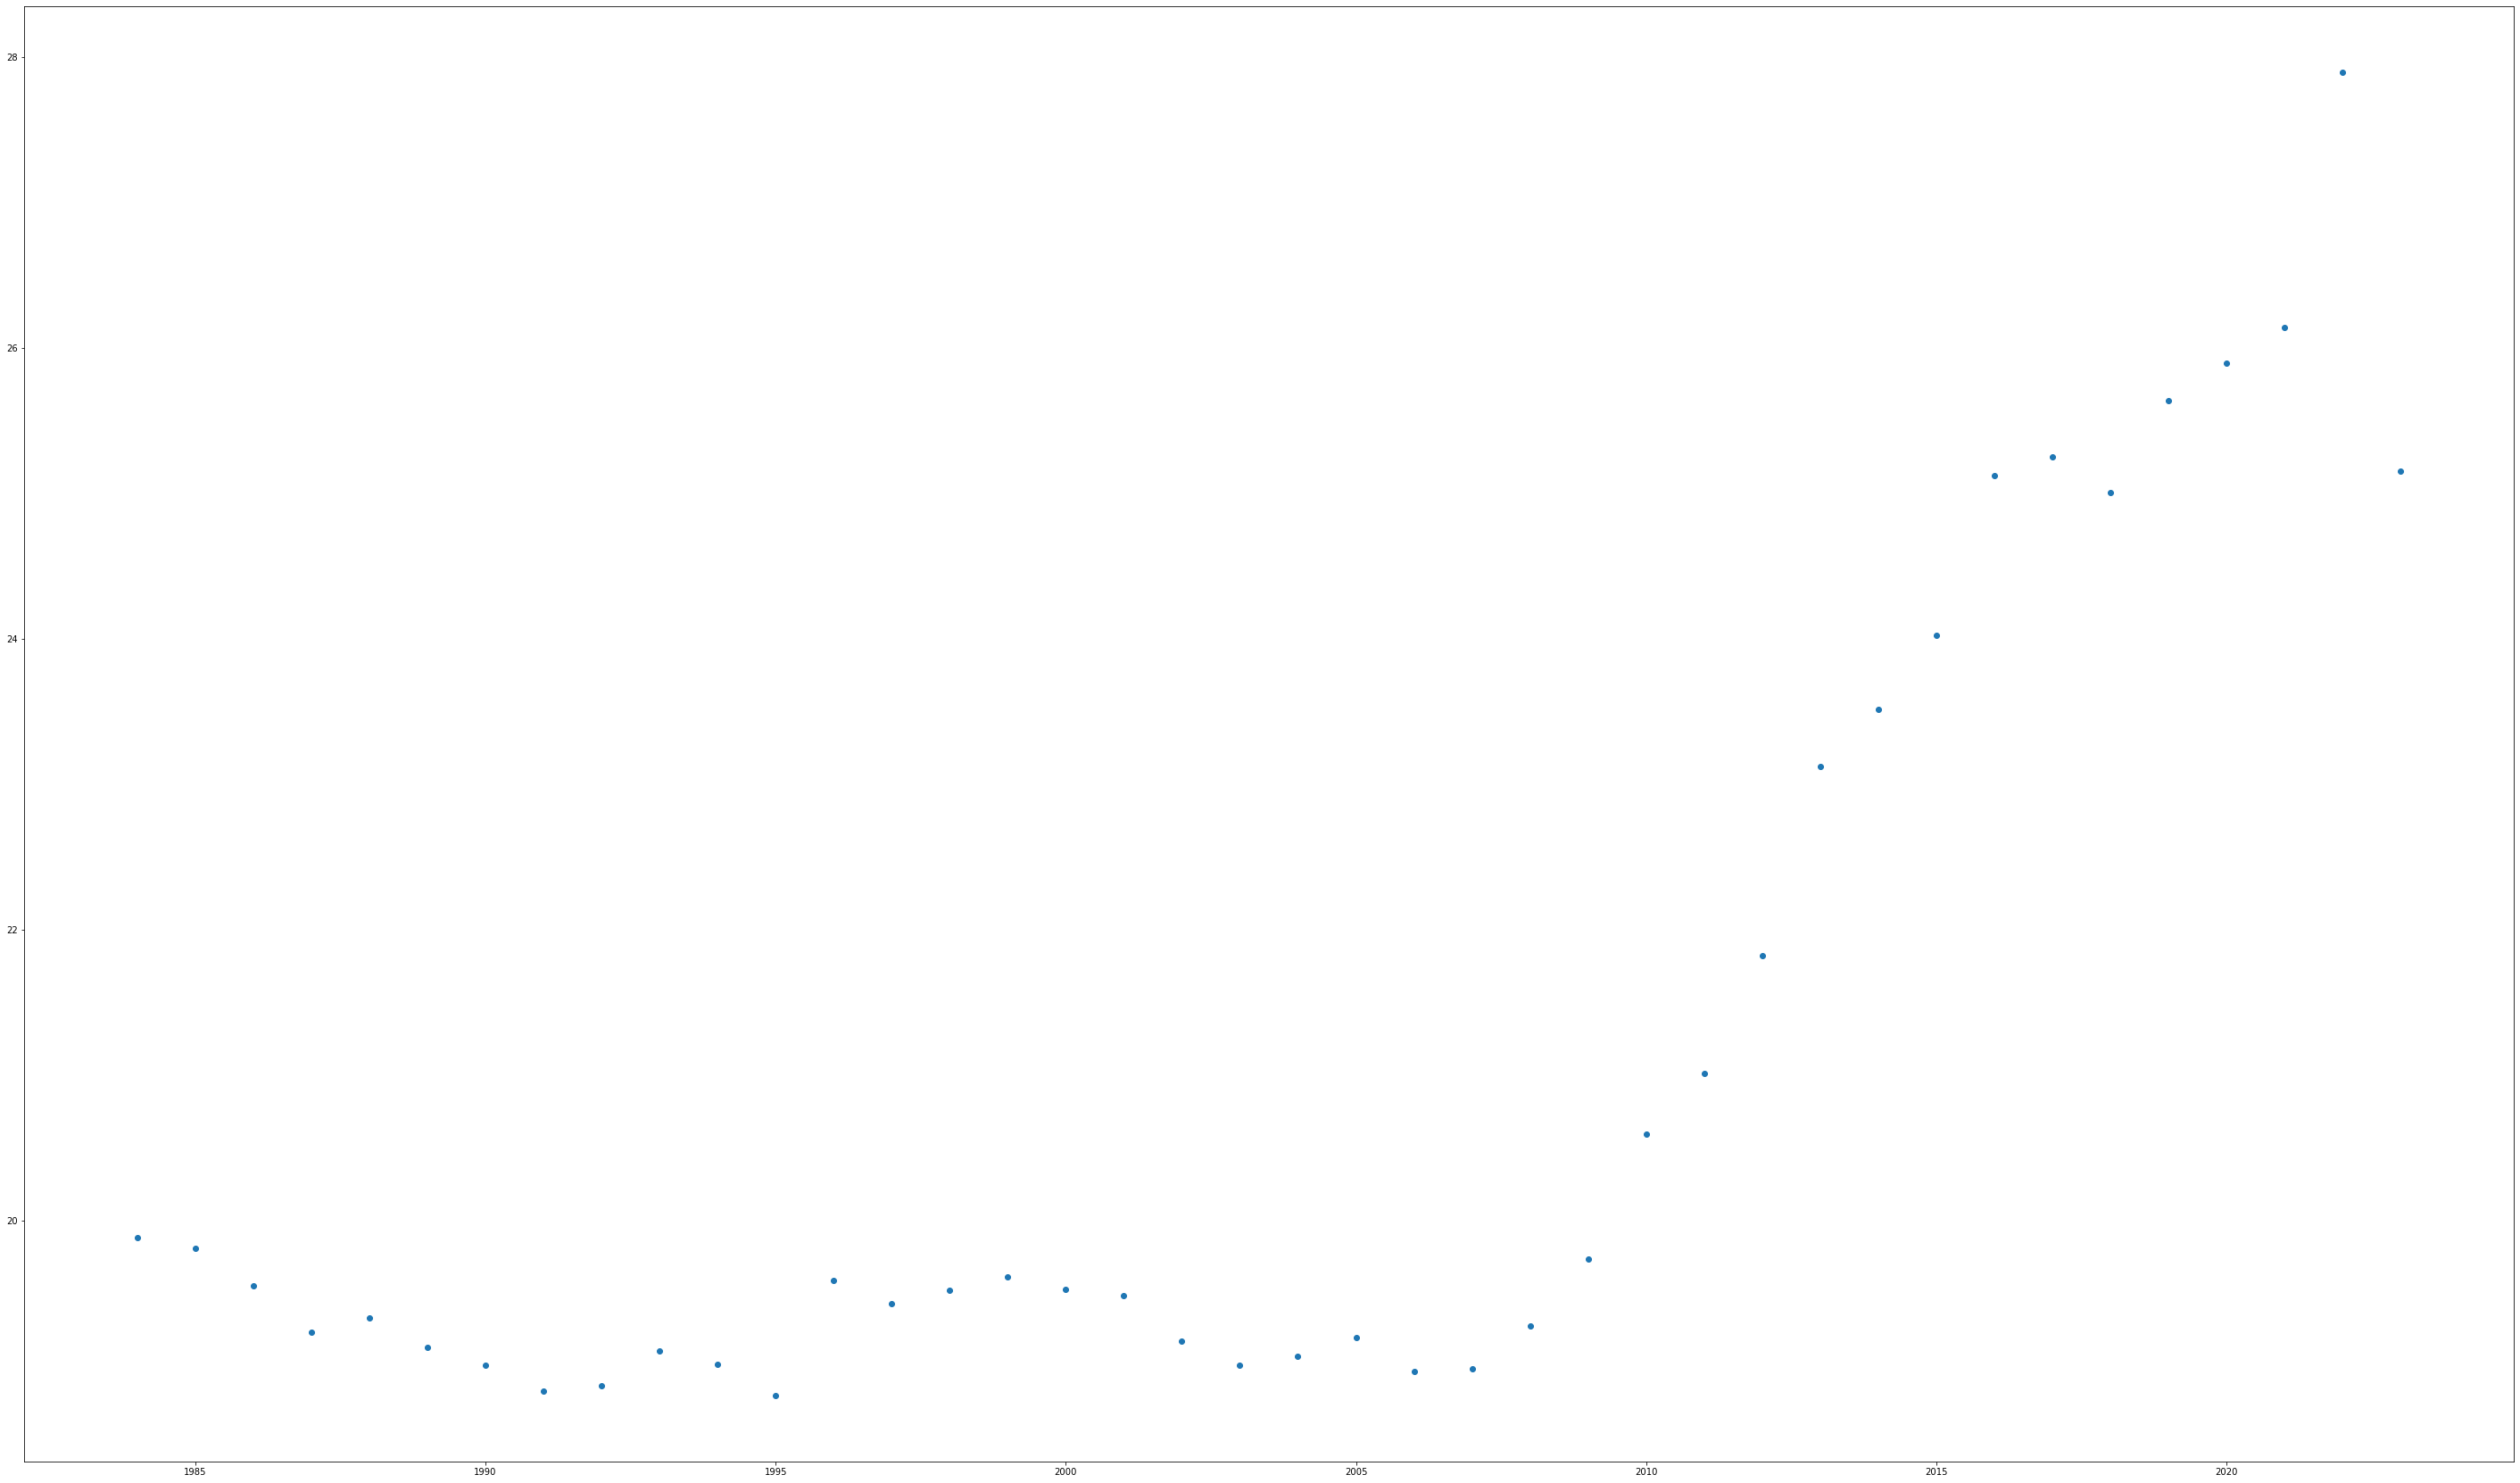

In [33]:
plt.figure(figsize=(50,30))
plt.scatter(average['year'], average['comb08_mean'])

###### on veux extraire seulement les voiture non hybrid. pour ce faire on doit verifier certain critere: critere 1 le type du vehicule doit etre different d'hybride , crtiter 2 l'essence doit etre premium, regulier, midgrate. critere on doit etre sur que le ligne contient un valeur null pour fuelType 2. avec la manipulation de donne avec pandas, on va extraire toutes les lignes qui respecte ces critere.

In [18]:
## le critere va renvoye toutes les lignes qui verifie ces conditions

critere1 = vehicle.fuelType1.isin(['Regular Gasoline','Premium Gasoline','Midgrade Gasoline'])
critere2 = vehicle.fuelType2.isnull()
critere3 = vehicle.atvType!='hybride'

## On va maintenant extraire toutes les voitures verifiant ces trois conditons
vehicule_non_hybrid = vehicle[critere1& critere2& critere3]
print(len(vehicule_non_hybrid))

41421


In [19]:
###### recalculons la moyenne comme precedant sur les voitures non hybride.
hybrid_groupe = vehicule_non_hybrid.groupby("year")
averge_non_hybrid = hybrid_groupe['comb08','highway08','city08'].agg(np.mean)
averge_non_hybrid["year"] = averge_non_hybrid.index
print(averge_non_hybrid)


         comb08  highway08     city08  year
year                                       
1984  19.121622  22.267333  17.264982  1984
1985  19.394686  22.584576  17.488010  1985
1986  19.320457  22.482880  17.432836  1986
1987  19.164568  22.407221  17.223342  1987
1988  19.367607  22.756142  17.360328  1988
1989  19.141964  22.491964  17.150893  1989
1990  19.031459  22.381316  17.055291  1990
1991  18.838060  22.288198  16.849039  1991
1992  18.861566  22.448087  16.804189  1992
1993  19.137383  22.831776  17.021495  1993
1994  19.092632  22.831579  16.977895  1994
1995  18.872591  22.786938  16.625268  1995
1996  19.530962  23.519104  17.233202  1996
1997  19.368000  23.392000  17.074667  1997
1998  19.329545  23.362374  16.929293  1998
1999  19.239759  23.200000  16.886747  1999
2000  19.211111  23.119753  16.883951  2000
2001  19.203448  23.104598  16.948276  2001
2002  19.040948  22.933190  16.740302  2002
2003  18.935288  22.792720  16.694641  2003
2004  19.123574  23.138783  16.7

/var/folders/fd/n41p4mw93qdgw6rl80wmq83h0000gn/T/ipykernel_16774/2635133811.py:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  averge_non_hybrid = hybrid_groupe['comb08','highway08','city08'].agg(np.mean)


Text(0.5, 1.0, 'La Moyenne de Comb08 par ans')

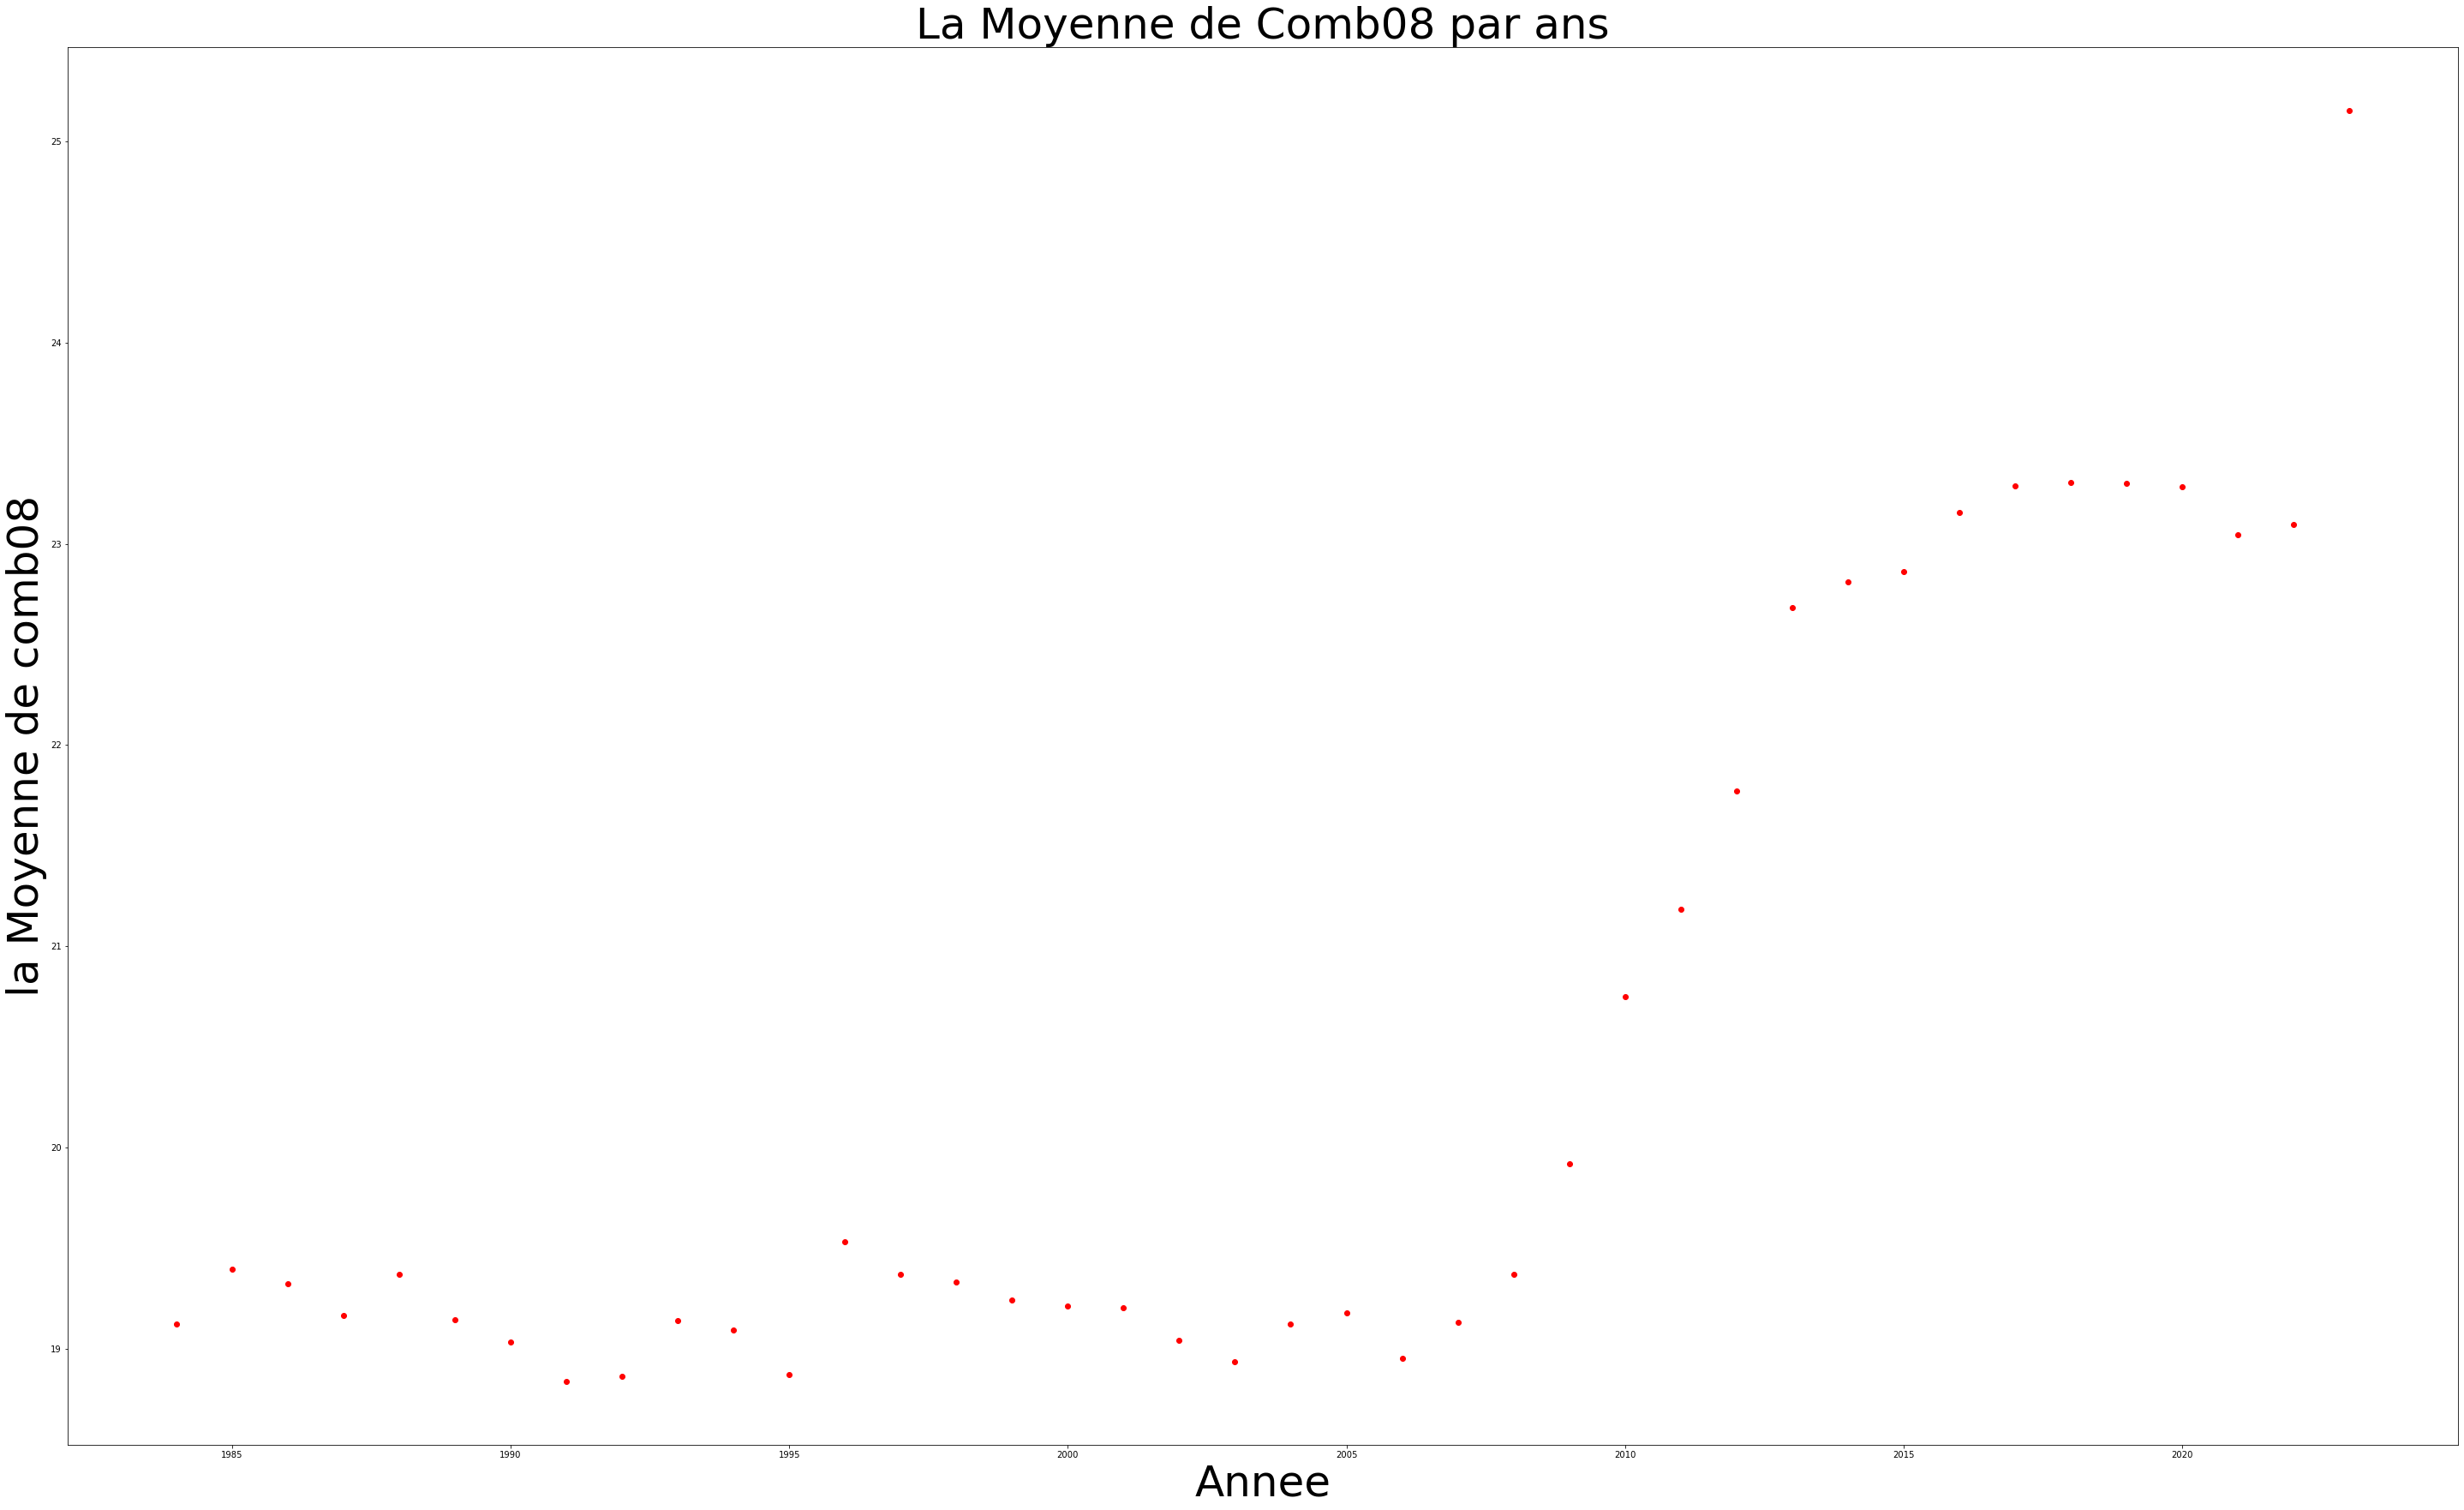

In [38]:
plt.figure(figsize=(50,30))
plt.scatter(averge_non_hybrid["year"], averge_non_hybrid["comb08"], color = "r")
plt.xlabel("Annee",fontsize = 50)
plt.ylabel("la Moyenne de comb08", fontsize = 50)
plt.title("La Moyenne de Comb08 par ans",fontsize = 50)
# plt.figure(figsize=(50,30))

In [21]:
pd.unique(vehicule_non_hybrid.displ)

array([2. , 4.9, 2.2, 5.2, 1.8, 1.6, 2.3, 2.8, 4. , 5. , 3.3, 3.1, 3.8,
       4.6, 3.4, 3. , 5.9, 2.5, 4.5, 6.8, 2.4, 2.9, 5.7, 4.3, 3.5, 5.8,
       3.2, 4.2, 1.9, 2.6, 7.4, 3.9, 1.5, 1.3, 4.1, 8. , 6. , 3.6, 5.4,
       5.6, 1. , 2.1, 1.2, 6.5, 2.7, 4.7, 5.5, 1.1, 5.3, 4.4, 3.7, 6.7,
       4.8, 1.7, 6.2, 8.3, 1.4, 6.1, 7. , 8.4, 6.3, nan, 6.6, 6.4, 0.9])

In [23]:
criteria = vehicule_non_hybrid.displ.notnull()
vehicule_non_hybrid = vehicule_non_hybrid[criteria]
vehicule_non_hybrid.displ = vehicule_non_hybrid.displ.astype('float')

In [25]:
vehicule_non_hybrid.columns

Index(['barrels08', 'barrelsA08', 'charge120', 'charge240', 'city08',
       'city08U', 'cityA08', 'cityA08U', 'cityCD', 'cityE', 'cityUF', 'co2',
       'co2A', 'co2TailpipeAGpm', 'co2TailpipeGpm', 'comb08', 'comb08U',
       'combA08', 'combA08U', 'combE', 'combinedCD', 'combinedUF', 'cylinders',
       'displ', 'drive', 'engId', 'eng_dscr', 'feScore', 'fuelCost08',
       'fuelCostA08', 'fuelType', 'fuelType1', 'ghgScore', 'ghgScoreA',
       'highway08', 'highway08U', 'highwayA08', 'highwayA08U', 'highwayCD',
       'highwayE', 'highwayUF', 'hlv', 'hpv', 'id', 'lv2', 'lv4', 'make',
       'model', 'mpgData', 'phevBlended', 'pv2', 'pv4', 'range', 'rangeCity',
       'rangeCityA', 'rangeHwy', 'rangeHwyA', 'trany', 'UCity', 'UCityA',
       'UHighway', 'UHighwayA', 'VClass', 'year', 'youSaveSpend', 'guzzler',
       'trans_dscr', 'tCharger', 'sCharger', 'atvType', 'fuelType2', 'rangeA',
       'evMotor', 'mfrCode', 'c240Dscr', 'charge240b', 'c240bDscr',
       'createdOn', 'modifiedOn

In [29]:
criteria = vehicule_non_hybrid.comb08.notnull()
vehicule_non_hybrid = vehicule_non_hybrid[criteria]
vehicule_non_hybrid.comb08 = vehicule_non_hybrid.comb08.astype('float')

Text(0, 0.5, 'Average MPG')

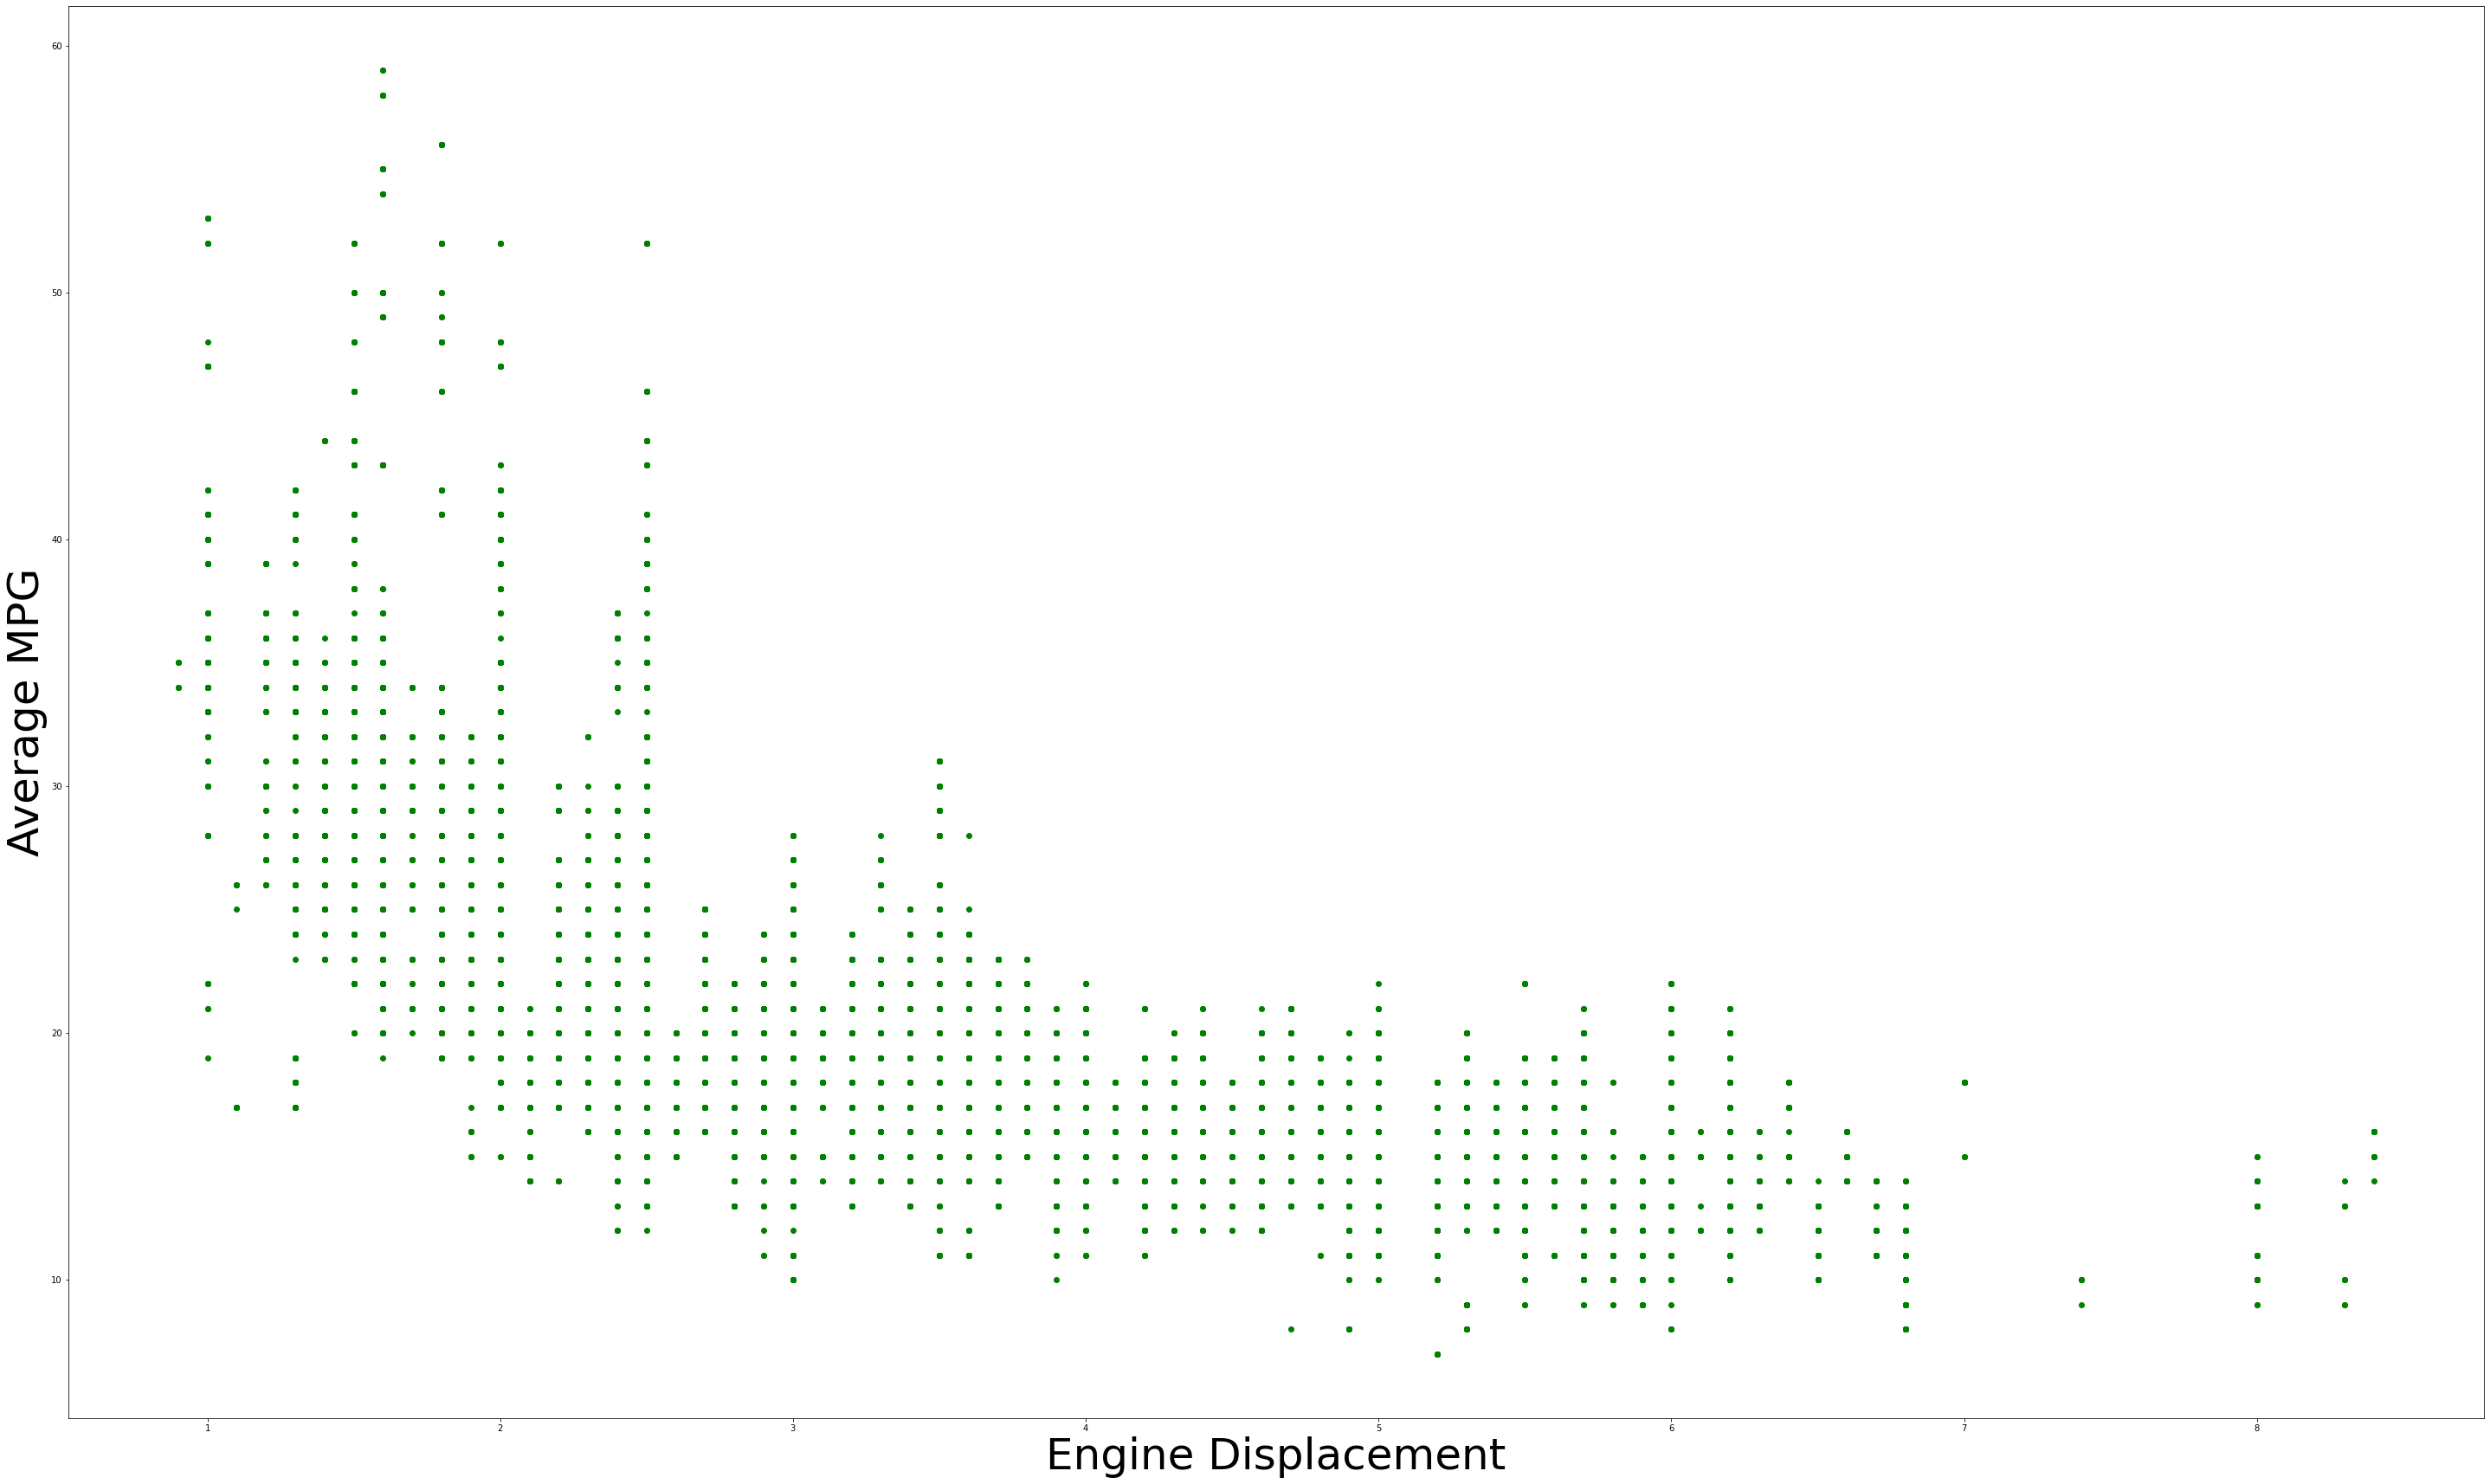

In [37]:
plt.figure(figsize=(50,30))
plt.scatter(vehicule_non_hybrid.displ, vehicule_non_hybrid.comb08, color = 'g')
plt.xlabel("Engine Displacement",fontsize = 50)
plt.ylabel("Average MPG", fontsize = 50)

In [34]:
grouped_by_year = vehicule_non_hybrid.groupby(['year'])
avg_groupe_by_year = grouped_by_year['displ','comb08'].agg([np.mean])


/var/folders/fd/n41p4mw93qdgw6rl80wmq83h0000gn/T/ipykernel_16774/3446593918.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  avg_groupe_by_year = grouped_by_year['displ','comb08'].agg([np.mean])


In [35]:
avg_groupe_by_year['year'] = avg_groupe_by_year.index
melted_avg_grouped_by_year = pd.melt(avg_groupe_by_year,id_vars='year')